# Google Playstore Case Study

Data visualisation data visualisation with the help of a case study. This will enable you to understand how visualisation aids you in solving business problems. 

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?


In [62]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read the dataset and check the first five rows
df0 = pd.read_csv('googleplaystore.csv')

In [5]:
# Check the shape of the dataframe
df0.shape

(10841, 13)

In [6]:
#check the first five rows
df0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [7]:
#Check the datatypes of all the columns of the dataframe
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
#Check the number of null values in the columns
df0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [9]:
#Drop the rows having null values in the Rating field
df1 = df0[~df0.Rating.isnull()]

#Check the shape of the dataframe
df1.shape

(9367, 13)

In [10]:
# Check the number of nulls in the Rating field again to cross-verify
df1.Rating.isnull().sum()

0

In [11]:
#Check the number of nulls in the dataframe again and find the total number of null values
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

- **Content Rating** column has 1 null value
- **Current Ver** column has 4 null values
- **Android Ver** column has 3 null values

In [12]:
#Inspect the nulls in the Android Version column
df1[df1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


- **Caterogy** column with 10,472 row has incorrect data entry

In [13]:
# Remove the record which has incorrect entry i.e 10,472 row
df1 = df1[~(df1['Android Ver'].isnull() & (df1['Category']=='1.9'))]

In [14]:
# Cross-verify whether record is removed or not
df1[df1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [15]:
#Check the most common value in the Android version column
df1['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 6.0                1
4.1 - 7.1.1              1
7.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [16]:
# Android ver is categorical type variable
#Fill up the nulls in the Android Version column with the above most occuring value
df1['Android Ver'] = df1['Android Ver'].fillna(df1['Android Ver'].mode()[0])

In [17]:
#Check the nulls in the Android version column again to cross-verify
df1['Android Ver'].value_counts()

4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 6.0                1
4.1 - 7.1.1              1
7.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [18]:
df1['Android Ver'].isnull().sum()

0

In [19]:
#Check the nulls in the entire dataframe again
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [20]:
#Check the most common value in the Current version column
df1['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
4.5.15                   1
5.4.7                    1
0.46.0                   1
4.5.2.1                  1
0.0.52                   1
Name: Current Ver, Length: 2638, dtype: int64

In [21]:
#Replace the nulls in the Current version column with the above most occuring value
df1['Current Ver'] = df1['Current Ver'].fillna(df1['Current Ver'].mode()[0])

In [22]:
df1['Current Ver'].value_counts()

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
4.5.15                   1
5.4.7                    1
0.46.0                   1
4.5.2.1                  1
0.0.52                   1
Name: Current Ver, Length: 2638, dtype: int64

In [23]:
df1['Current Ver'].value_counts()

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
4.5.15                   1
5.4.7                    1
0.46.0                   1
4.5.2.1                  1
0.0.52                   1
Name: Current Ver, Length: 2638, dtype: int64

In [24]:
df1['Current Ver'].isnull().sum()

0

#### Handling Incorrect Data Types 

In [25]:
df1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [26]:
df1.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [27]:
# Convert Price column data type by float and handle '$' sign
df1.Price = df1.Price.apply(lambda x: 0 if x == "0" else float(x[1:]))

In [28]:
df1.Price.dtype

dtype('float64')

In [30]:
#Analyse the Installs Column
df1.Installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [31]:
df1.Installs.dtypes

dtype('O')

In [32]:
# Convert Installs column data type by int and handle ',' sign
df1.Installs = df1.Installs.apply(lambda x: int(x.replace(",","")[:-1]))

In [33]:
df1.Installs.dtypes

dtype('int64')

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [36]:
df1.Reviews = df1.Reviews.apply(lambda x: int(x))

In [37]:
df1.Reviews.dtypes

dtype('int64')

In [45]:
# Number of Reviews is less than or equal to the number of Installs
df1 = df1[df1.Reviews <= df1.Installs]

In [46]:
# Perform the sanity checks on prices of free apps 
df1[(df1.Type == 'Free') & (df1.Price > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [48]:
#import the plotting libraries
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
#Check the apps with price more than 200
df1 = df1[df1.Price < 200]

<AxesSubplot:>

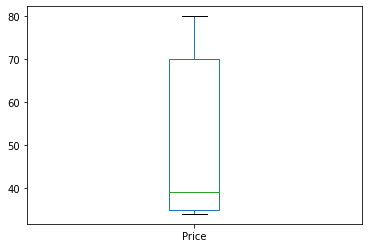

In [53]:
#Check the apps with price more than 30
df1[df1.Price > 30].Price.plot.box()

### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.

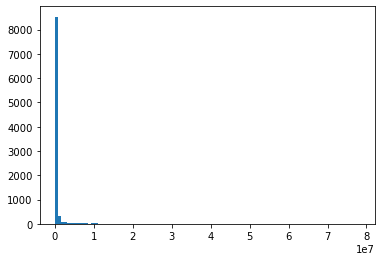

In [56]:
#Create a histogram of the Reviews
plt.hist(df1['Reviews'], bins=100)
plt.show()

In [57]:
#Check records with 1 million reviews
df1 = df1[df1.Reviews <= 1000000]
df1.shape

(8640, 13)

In [64]:
# CLean the Installs by removing all the apps having more than or equal to 100 million installs
df1 = df1[df1.Installs <= 100000000]
df1.shape

(8630, 13)

In [83]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes


In [87]:
import seaborn as sns

#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve. 

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

You'll be using sns.distplot for plotting a distribution plot. Check out its official documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

In [94]:
import warnings
warnings.filterwarnings('ignore')

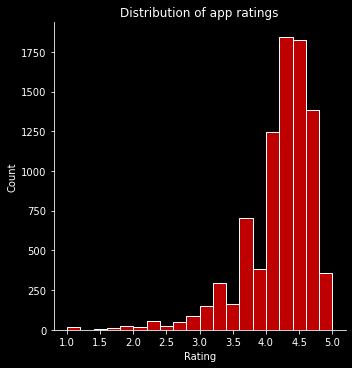

In [95]:
plt.style.use('dark_background')
sns.displot(df1.Rating, bins=20, color='r')
plt.title('Distribution of app ratings', fontsize=12)
plt.show()

In [97]:
#Analyse the Content Rating column
df1['Content Rating'].value_counts()

Everyone           6944
Teen                928
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [98]:
df1 = df1[~df1['Content Rating'].isin(['Adults only 18+','Unrated'])]

In [100]:
df1["Content Rating"].value_counts()

Everyone        6944
Teen             928
Mature 17+       417
Everyone 10+     337
Name: Content Rating, dtype: int64

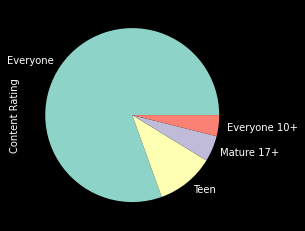

In [101]:
#Plot a pie chart
df1['Content Rating'].value_counts().plot.pie()
plt.show()

<AxesSubplot:>

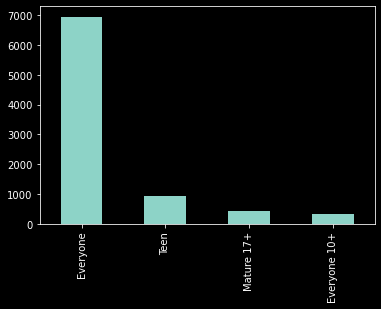

In [102]:
#Plot a bar chart
df1['Content Rating'].value_counts().plot.bar()

- **Ques:** Plot a bar plot for checking the 4th highest Android version type

<AxesSubplot:>

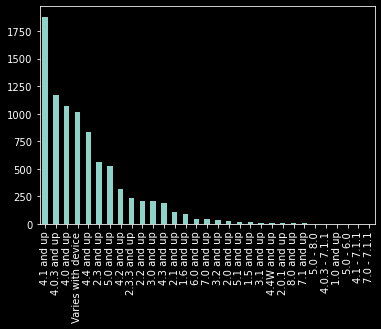

In [103]:
df1['Android Ver'].value_counts().plot.bar()

#### Scatter Plots

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot. 

- They're pretty useful in regression problems to check whether a linear trend exists in the data or not. For example, in the image below, creating a linear model in the first case makes far more sense since a clear straight line trend is visible.

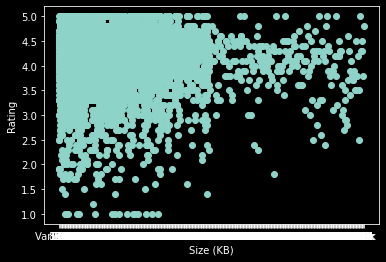

In [106]:
###Size vs Rating

##Plot a scatter-plot in the matplotlib way between Size and Rating

plt.scatter(df1.Size, df1.Rating)
plt.xlabel('Size (KB)')
plt.ylabel('Rating')
plt.show()

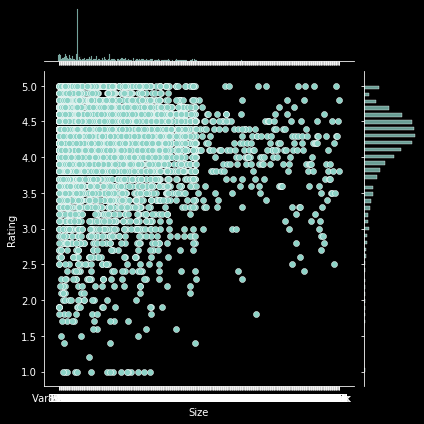

In [107]:
### Plot the same thing now using a jointplot
sns.jointplot(df1.Size, df1.Rating)
plt.show()

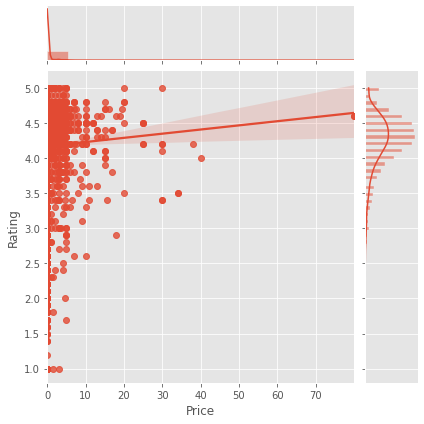

In [108]:
##Plot a reg plot for Price and Rating and observe the trend
plt.style.use('ggplot')
sns.jointplot(df1.Price, df1.Rating, kind='reg')
plt.show()

### Pair Plots

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

It is clearly visible that the left-most factor is the most prominently related to the profits, given how linearly scattered the points are and how randomly scattered the rest two factors are.

You'll be using **sns.pairplot()** for this visualisation. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.pairplot.html

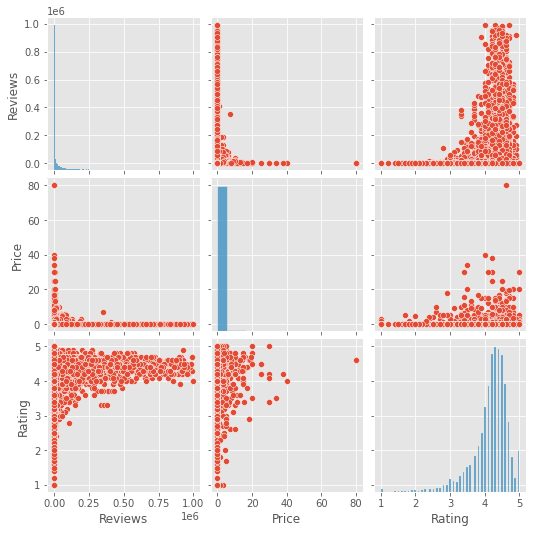

In [113]:
## Create a pair plot for Reviews, Size, Price and Rating
sns.pairplot(df1[['Reviews','Size','Price','Rating']])
plt.show()

**Bar Charts Revisited**

<AxesSubplot:xlabel='Content Rating'>

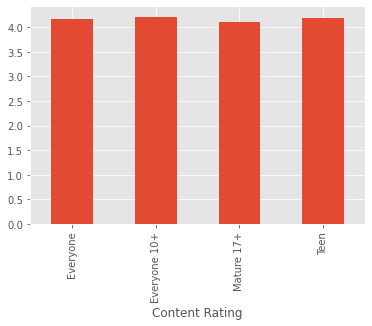

In [114]:
##Plot a bar plot of Content Rating vs Average Rating 
df1.groupby(by=['Content Rating'])['Rating'].mean().plot.bar()

<AxesSubplot:xlabel='Content Rating'>

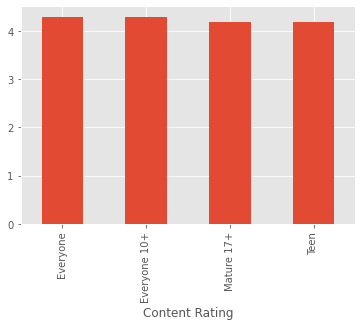

In [116]:
##Plot the bar plot again with Median Rating

df1.groupby(by=['Content Rating'])['Rating'].median().plot.bar()

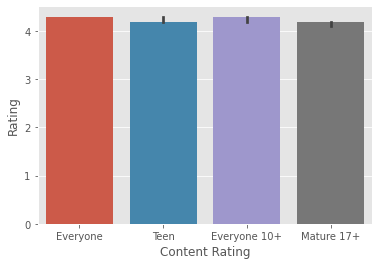

In [117]:
##Plot the above bar plot using the estimator parameter
sns.barplot(data=df1, x = 'Content Rating', y = 'Rating', estimator=np.median)
plt.show()

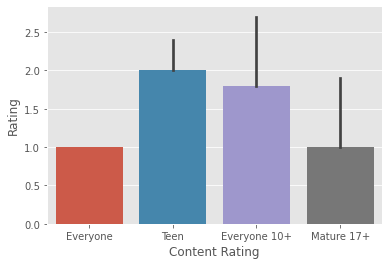

In [119]:
sns.barplot(data=df1, x = 'Content Rating', y = 'Rating', estimator=np.min)
plt.show()

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories

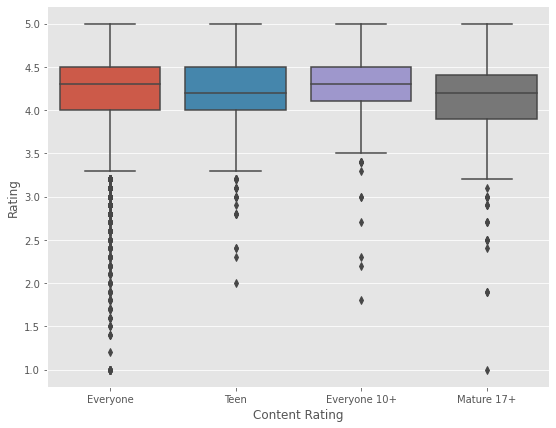

In [120]:
##Plot a box plot of Rating vs Content Rating
plt.figure(figsize=[9,7])
sns.boxplot(df1['Content Rating'], df1.Rating)
plt.show()

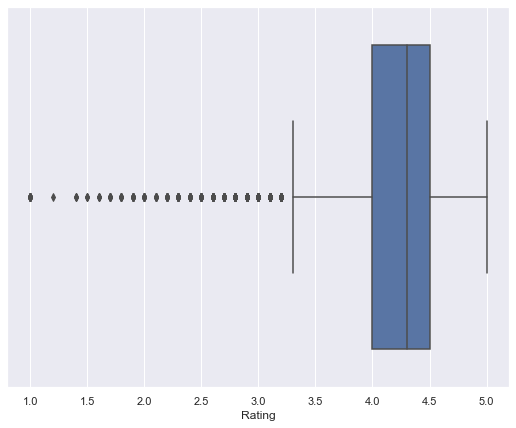

In [157]:
# Plot a box plot for the Rating column only
plt.figure(figsize=(9,7))
sns.boxplot(df1.Rating)
plt.show()

In [131]:
df1.Genres.value_counts()

Tools                     694
Entertainment             508
Education                 464
Medical                   349
Finance                   315
                         ... 
Arcade;Pretend Play         1
Parenting;Brain Games       1
Lifestyle;Pretend Play      1
Lifestyle;Education         1
Racing;Pretend Play         1
Name: Genres, Length: 115, dtype: int64

### Top 4 most popular Genres
- Tools
- Entertainment
- Education
- Medical

In [143]:
df_top4 = df1[df1['Genres'].isin(['Tools','Entertainment','Education','Medical'])]

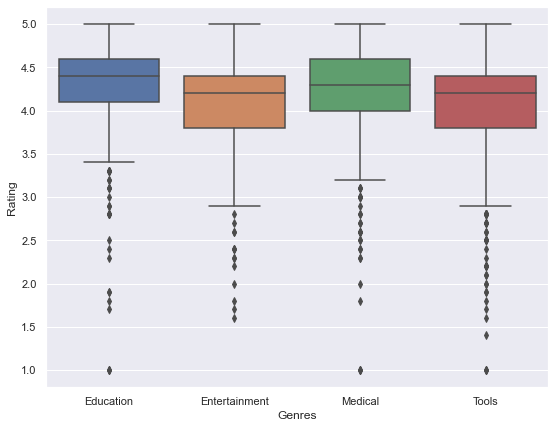

In [158]:
# Plot a box plot of Ratings across the 4 most popular Genres
plt.figure(figsize=(9,7))
sns.set_theme(style='darkgrid')
sns.boxplot(x='Genres', y='Rating', data=df_top4)
plt.show()

#### Line Plots

- A line plot tries to observe trends using time dependent data.
-  For this part, you'll be using **pd.to_datetime()** function. Check out its documentation:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

In [169]:
## Extract the month from the Last Updated Date
df1['Last Updated'].head()
df1['updated_month'] = pd.to_datetime(df1['Last Updated']).dt.month

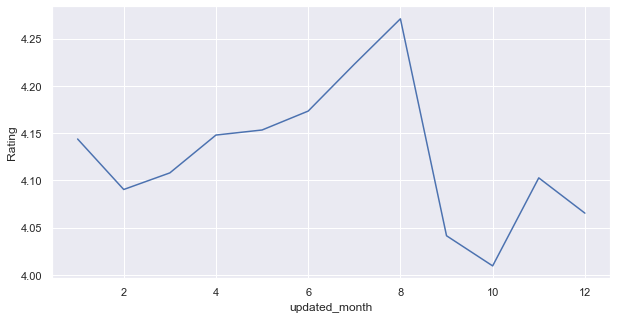

In [171]:
## Find the average Rating across all the months
plt.figure(figsize=[10,5])
df1.groupby(by=['updated_month'])['Rating'].mean().plot()
plt.ylabel('Rating')
plt.show()

#### Stacked Bar Charts

In [172]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
monthly = pd.pivot_table(data=df1, values="Installs", index='updated_month', columns="Content Rating", aggfunc=sum)

<AxesSubplot:xlabel='updated_month'>

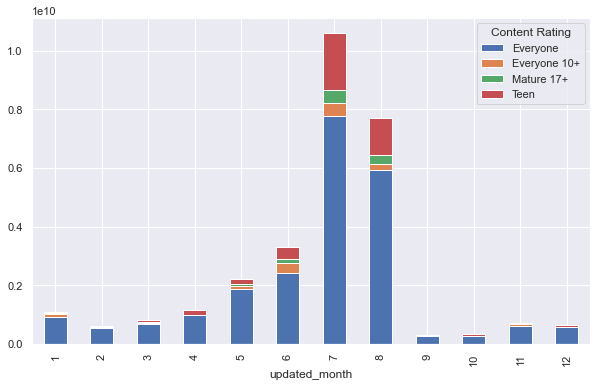

In [173]:
monthly.plot(kind='bar', stacked='True', figsize=[10,6])

<AxesSubplot:xlabel='updated_month'>

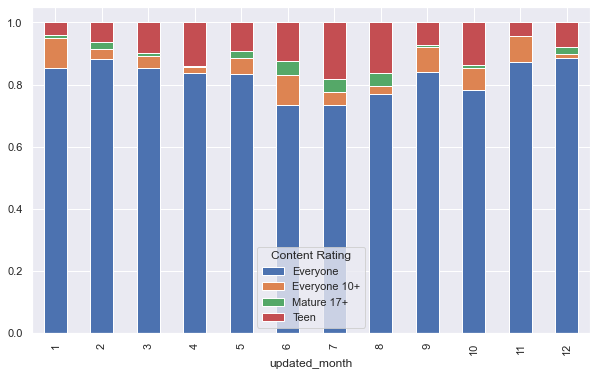

In [174]:
##Plot the stacked bar chart again wrt to the proportions.
monthly_prop = monthly[['Everyone', 'Everyone 10+', 'Mature 17+', 'Teen']].apply(lambda x : x/x.sum(), axis=1)
monthly_prop.plot(kind='bar', stacked='True', figsize=[10,6])